In [72]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import print_function, division
from scipy import stats

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

In [73]:
digits = load_digits()
X = digits.data
y = digits.target

In [74]:
pca = PCA(2)  # project from 64 to 2 dimensions
Xproj = pca.fit_transform(X)
print(X.shape)
print(Xproj.shape)

(1797, 64)
(1797, 2)


array([0, 1, 2, ..., 8, 9, 8])

In [2]:
G=nx.Graph()

In [9]:
G.add_node(1)

In [5]:

def simple_graph():

    #create an empty graph
    G = nx.Graph()
    
    #add three edges
    G.add_edge('A','B');
    G.add_edge('B','C');
    G.add_edge('C','A');

    #draw the graph
    nx.draw(G)

simple_graph()

Nodes of graph: 
['a', 'b', 'c', 1, 2, 'd', 'e']
Edges of graph: 
[('a', 'b'), (1, 2), ('d', 'e')]


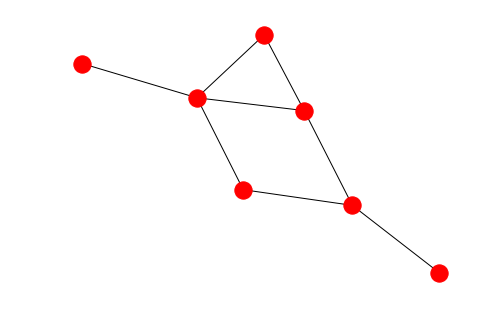

In [33]:

G=nx.Graph()


G.add_node("a")
G.add_nodes_from(["b","c"])

G.add_edge(1,2)
edge = ("d", "e")
G.add_edge(*edge)
edge = ("a", "b")
G.add_edge(*edge)

print("Nodes of graph: ")
print(G.nodes())
print("Edges of graph: ")
print(G.edges())
G.add_edges_from([("a","c"),("c","d"), ("a",1), (1,"d"), ("a",2)])
nx.draw(G)
plt.show()

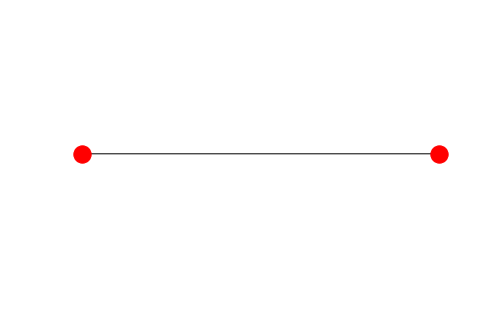

In [52]:
def draw_graph(graph):

    # extract nodes from graph
    nodes = set([n1 for n1, n2 in graph] + [n2 for n1, n2 in graph])

    # create networkx graph
    G=nx.Graph()

    # add nodes
    for node in nodes:
        G.add_node(node)

    # add edges
    for edge in graph:
        G.add_edge(edge[0], edge[1])

    # draw graph
    pos = nx.shell_layout(G)
    nx.draw(G, pos)

    # show graph
    plt.show()

# draw example
graph = [('family income', 'repayment rate')]
draw_graph(graph)

In [49]:
nx.draw(G)

In [50]:
def simple_graph():

    #create an empty graph
    G = nx.Graph()
    
    #add three edges
    G.add_edge('A','B');
    G.add_edge('B','C');
    G.add_edge('C','A');

    #draw the graph
    nx.draw(G)

simple_graph()

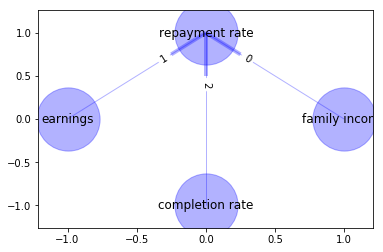

In [68]:
def draw_graph(graph, labels=None, graph_layout='shell',
               node_size=4000, node_color='blue', node_alpha=0.3,
               node_text_size=12,
               edge_color='blue', edge_alpha=0.3, edge_tickness=1,
               edge_text_pos=0.3,
               text_font='sans-serif'):

    # create networkx graph
    G=nx.DiGraph()

    # add edges
    for edge in graph:
        G.add_edge(edge[0], edge[1])

    # these are different layouts for the network you may try
    # shell seems to work best
    if graph_layout == 'spring':
        graph_pos=nx.spring_layout(G)
    elif graph_layout == 'spectral':
        graph_pos=nx.spectral_layout(G)
    elif graph_layout == 'random':
        graph_pos=nx.random_layout(G)
    else:
        graph_pos=nx.shell_layout(G)

    # draw graph
    nx.draw_networkx_nodes(G,graph_pos,node_size=node_size, 
                           alpha=node_alpha, node_color=node_color)
    nx.draw_networkx_edges(G,graph_pos,width=edge_tickness,
                           alpha=edge_alpha,edge_color=edge_color)
    nx.draw_networkx_labels(G, graph_pos,font_size=node_text_size,
                            font_family=text_font)
    if labels is None:
        labels = range(len(graph))

    edge_labels = dict(zip(graph, labels))
    nx.draw_networkx_edge_labels(G, graph_pos, edge_labels=edge_labels, 
                                 label_pos=edge_text_pos)

    # show graph
    plt.show()

graph = [('family income','repayment rate'),('earnings','repayment rate'),('completion rate','repayment rate')]

# you may name your edge labels
edge_labels = ['+','+','+']
#draw_graph(graph, labels)

# if edge labels is not specified, numeric labels (0, 1, 2...) will be used
draw_graph(graph)